In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define a custom activation function with learnable spline parameters
class LearnableActivation(layers.Layer):
    def __init__(self, grid_size=5, base_activation=None, **kwargs):
        super().__init__(**kwargs)
        self.grid_size = grid_size
        self.base_activation = base_activation
        self.spline_params = self.add_weight(
            shape=(grid_size,), initializer="random_normal", trainable=True
        )

    def call(self, inputs):
        # Define a spline-like transformation on the base activation
        base_out = self.base_activation(inputs) if self.base_activation else inputs
        spline_out = tf.reduce_sum(self.spline_params * inputs[:, None], axis=-1)
        return base_out + spline_out

In [3]:
# Build a simple LAN with learnable activation functions
def build_lan(width, depth, grid_size):
    inputs = keras.Input(shape=(1,))
    x = inputs
    for _ in range(depth):
        # Adding custom activation layer with learnable activation
        x = layers.Dense(width)(x)
        x = LearnableActivation(grid_size, base_activation=tf.math.sin)(x)
    outputs = layers.Dense(1)(x)
    return keras.Model(inputs, outputs)

In [4]:
# Generate a synthetic dataset for demonstration
def generate_synthetic_data(num_samples=1000):
    # Create x values between -2 and 2
    x = np.linspace(-2, 2, num_samples)
    # Define a synthetic function
    y = np.exp(np.sin(np.pi * x))
    return x, y

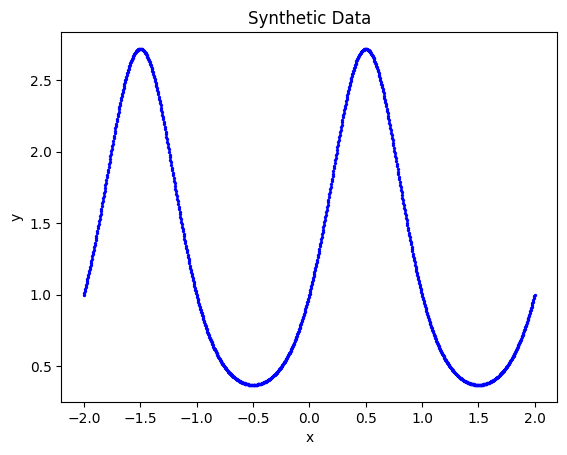

In [5]:
# Generate synthetic data
x, y = generate_synthetic_data()

# Plot the data
plt.scatter(x, y, s=2, c='b', label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic Data')
plt.show()

In [6]:
# Create the LAN model
width = 128
depth = 5
grid_size = 5

model = build_lan(width, depth, grid_size)
model.compile(optimizer='adam', loss='mse')

ValueError: Exception encountered when calling layer "learnable_activation" (type LearnableActivation).

in user code:

    File "C:\Users\DELL\AppData\Local\Temp\ipykernel_15312\963699857.py", line 14, in call  *
        spline_out = tf.reduce_sum(self.spline_params * inputs[:, None], axis=-1)

    ValueError: Dimensions must be equal, but are 5 and 128 for '{{node learnable_activation/mul}} = Mul[T=DT_FLOAT](learnable_activation/ReadVariableOp, learnable_activation/strided_slice)' with input shapes: [5], [?,1,128].


Call arguments received by layer "learnable_activation" (type LearnableActivation):
  • inputs=tf.Tensor(shape=(None, 128), dtype=float32)